# Health and Income Level

In [1]:
%pip install matplotlib
%conda install matploblib -y
%pip install gdown

Note: you may need to restart the kernel to use updated packages.
Retrieving notices: ...working... done
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.
Solving environment: unsuccessful initial attempt using frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - matploblib

Current channels:

  - https://repo.anaconda.com/pkgs/main/osx-arm64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-arm64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## 탐구질문 / Research Question

소득 수준과 건강 요소(신체적 건강, 정신적 건강)의 관계는 무엇인가?

## 배경 지식 / Background Information

## 가설 / Hypothesis

소득 수준이 높을수록 신체적 건강은 좋으나 정신적 건강은 나빠질 것이다.

이는 국가의 소득수준이 높을수록 건강관리를 위한 시설이 더 잘 갖추어져 있어 신체적 건강을 유지하기 더 유리하다. 그러나 정신적 건강의 측면에서 보면 선진국에서 오히려 정신질환을 가진 사람이 많다는 연구결과를 찾아볼 수 있다.

## 변수 / Variables

### Independent Variable
- GDP per capita: A country's total GDP divided by its population. 국가의 소득수준을 나타내는 변수로 쓰인다.(data from World Bank)
### Dependent Variable
- Share of population with mental health disorders: 전체 인구 중 정신질환을 가진 인구의 비율을 나타낸 값으로, 정신 건강의 지표로 쓰인다. 
- Prevalence of cardiovascular disease: 전체 인구 중 새로 생긴 질병인지, 원래 존재하던 질병인지 상관 없이 심장병이 나타나는 정도를 나타낸 값으로, 신체적 건강의 지표로 쓰인다. 
- Prevalence of undernurishment: 전체 인구 중 영양 부족이 나타나는 정도를 나타낸 값이며, 이 또한 신체적 건강의 지표로 쓰인다.

## 원자료 / Raw Data 

In [2]:
import gdown
import pandas as pd
import numpy as np

In [47]:
# 파일 다운로드 - 2019 GDP
file_id = '152oyaalPLv9xuXyyRMaT90OmtVmFCrit'
url = f'https://drive.google.com/uc?id={file_id}'

output = 'gdp2019.csv'
gdown.download(url, output, quiet=False)

# gdp 변수에 저장
gdp19 = pd.read_csv(output)
display(gdp19)

Downloading...
From: https://drive.google.com/uc?id=152oyaalPLv9xuXyyRMaT90OmtVmFCrit
To: /Users/student/GIRE Python/gdp2019.csv
100%|███████████████████████████████████████| 9.32k/9.32k [00:00<00:00, 853kB/s]


,Country Name,Country Code,2019
0,Aruba,ABW,31902.809818
1,Africa Eastern and Southern,AFE,1507.982881
2,Afghanistan,AFG,497.741429
3,Africa Western and Central,AFW,1812.446822
4,Angola,AGO,2191.347764
...,...,...,...
261,Kosovo,XKX,4416.029253
262,"Yemen, Rep.",YEM,693.816504
263,South Africa,ZAF,6702.526617
264,Zambia,ZMB,1268.120941


In [48]:
# country code 가 없는 대륙이나 세계 전체에 대한 열은 삭제
gdp19.dropna(inplace=True)
gdp19.rename(columns={'Country Name': 'Country', 'Country Code': 'Code','2019':'GDP'}, inplace=True)
display(gdp19)

,Country,Code,GDP
0,Aruba,ABW,31902.809818
1,Africa Eastern and Southern,AFE,1507.982881
2,Afghanistan,AFG,497.741429
3,Africa Western and Central,AFW,1812.446822
4,Angola,AGO,2191.347764
...,...,...,...
261,Kosovo,XKX,4416.029253
262,"Yemen, Rep.",YEM,693.816504
263,South Africa,ZAF,6702.526617
264,Zambia,ZMB,1268.120941


In [49]:
# 파일 다운로드 - depression/anxiety
file_id = '1fzB2WCcTEu2oTd9X9tnGseSX2gHDT7mj'
url = f'https://drive.google.com/uc?id={file_id}'

output = 'mental.csv'
gdown.download(url, output, quiet=False)

# mental 변수에 저장
mental = pd.read_csv(output)
display(mental)

Downloading...
From: https://drive.google.com/uc?id=1fzB2WCcTEu2oTd9X9tnGseSX2gHDT7mj
To: /Users/student/GIRE Python/mental.csv
100%|█████████████████████████████████████████| 206k/206k [00:00<00:00, 716kB/s]


,Entity,Code,Year,Share
0,Afghanistan,AFG,1990,16.239439
1,Afghanistan,AFG,1991,16.348890
2,Afghanistan,AFG,1992,16.460773
3,Afghanistan,AFG,1993,16.579790
4,Afghanistan,AFG,1994,16.704570
...,...,...,...,...
6775,Zimbabwe,ZWE,2015,10.713241
6776,Zimbabwe,ZWE,2016,10.703661
6777,Zimbabwe,ZWE,2017,10.693566
6778,Zimbabwe,ZWE,2018,10.669615


In [50]:
# 2019년 데이터만 사용할 수 있도록 나머지 연도의 열 삭제
mental = mental[mental['Year'] == 2019]

# 결측치가 있는 열 삭제
mental.dropna(inplace=True)
mental.rename(columns={'Entity': 'Country', 'Country Code': 'Code','Share':'Mental Illness'}, inplace=True)
display(mental)

,Country,Code,Year,Mental Illness
29,Afghanistan,AFG,2019,16.496300
89,Albania,ALB,2019,10.820449
119,Algeria,DZA,2019,13.960705
149,American Samoa,ASM,2019,10.685423
179,Andorra,AND,2019,14.063967
...,...,...,...,...
6599,Vietnam,VNM,2019,9.110317
6689,World,OWID_WRL,2019,12.261982
6719,Yemen,YEM,2019,15.924701
6749,Zambia,ZMB,2019,11.881151


In [51]:
# 파일 다운로드 - cardiovascular
file_id = '1IzdwUtVqmxS9sBuXLA6dUkYEih5wHsvz'
url = f'https://drive.google.com/uc?id={file_id}'

output = 'cardio.csv'
gdown.download(url, output, quiet=False)

# cardio 변수에 저장
cardio = pd.read_csv(output)
display(cardio)

Downloading...
From: https://drive.google.com/uc?id=1IzdwUtVqmxS9sBuXLA6dUkYEih5wHsvz
To: /Users/student/GIRE Python/cardio.csv
100%|█████████████████████████████████████████| 219k/219k [00:00<00:00, 985kB/s]


,Entity,Code,Year,Share
0,Afghanistan,AFG,1990,8.160259
1,Afghanistan,AFG,1991,8.169889
2,Afghanistan,AFG,1992,8.180185
3,Afghanistan,AFG,1993,8.185960
4,Afghanistan,AFG,1994,8.191086
...,...,...,...,...
6775,Zimbabwe,ZWE,2015,6.480646
6776,Zimbabwe,ZWE,2016,6.468623
6777,Zimbabwe,ZWE,2017,6.459301
6778,Zimbabwe,ZWE,2018,6.459590


In [52]:
# 2019년 데이터만 사용할 수 있도록 나머지 연도의 열 삭제
cardio = cardio[cardio['Year'] == 2019]

# 결측치가 있는 열 삭제
cardio.dropna(inplace=True)
cardio.rename(columns={'Entity': 'Country','Share':'Cardio Disease'}, inplace=True)
display(cardio)

,Country,Code,Year,Cardio Disease
29,Afghanistan,AFG,2019,8.244712
89,Albania,ALB,2019,7.244842
119,Algeria,DZA,2019,7.756783
149,American Samoa,ASM,2019,7.327964
179,Andorra,AND,2019,5.118992
...,...,...,...,...
6599,Vietnam,VNM,2019,5.546428
6689,World,OWID_WRL,2019,6.431569
6719,Yemen,YEM,2019,8.118896
6749,Zambia,ZMB,2019,6.229960


In [53]:
# 파일 다운로드 - undernurishment
file_id = '1T3eE_wZyRO96uBuvNP_7I1Qa4ISmoYfl'
url = f'https://drive.google.com/uc?id={file_id}'

output = 'undernurished.csv'
gdown.download(url, output, quiet=False)

# undernurished 변수에 저장
undernurished = pd.read_csv(output)
display(undernurished)

Downloading...
From: https://drive.google.com/uc?id=1T3eE_wZyRO96uBuvNP_7I1Qa4ISmoYfl
To: /Users/student/GIRE Python/undernurished.csv
100%|██████████████████████████████████████| 6.50k/6.50k [00:00<00:00, 4.53MB/s]


,Country Name,Country Code,2019
0,Aruba,ABW,NaN
1,Africa Eastern and Southern,AFE,24.374440
2,Afghanistan,AFG,26.900000
3,Africa Western and Central,AFW,12.824235
4,Angola,AGO,17.500000
...,...,...,...
261,Kosovo,XKX,NaN
262,"Yemen, Rep.",YEM,38.900000
263,South Africa,ZAF,6.100000
264,Zambia,ZMB,29.200000


In [54]:
# 결측치가 있는 열 삭제
undernurished.dropna(inplace=True)
undernurished.rename(columns={'Country Name': 'Country', 'Country Code': 'Code','2019':'Undernurished'}, inplace=True)
display(undernurished)

,Country,Code,Undernurished
1,Africa Eastern and Southern,AFE,24.374440
2,Afghanistan,AFG,26.900000
3,Africa Western and Central,AFW,12.824235
4,Angola,AGO,17.500000
5,Albania,ALB,4.100000
...,...,...,...
260,Samoa,WSM,7.400000
262,"Yemen, Rep.",YEM,38.900000
263,South Africa,ZAF,6.100000
264,Zambia,ZMB,29.200000


## 데이터 가공

### 데이터세트 결합

In [60]:
# 하나의 데이터세트로 사용할 수 있도록 위의 데이터세트에서 통일된 연도의 데이터를 사용해 하나의 결합된 새로운 데이터세트를 만든다
merged = pd.merge(gdp19, mental, on=['Country', 'Code'])
merged = pd.merge(merged, cardio, on=['Country','Code','Year'])
merged = pd.merge(merged, undernurished, on=['Country','Code'])
display(merged)

,Country,Code,GDP,Year,Mental Illness,Cardio Disease,Undernurished
0,Afghanistan,AFG,497.741429,2019,16.496300,8.244712,26.9
1,Angola,AGO,2191.347764,2019,13.085214,6.569765,17.5
2,Albania,ALB,5396.214243,2019,10.820449,7.244842,4.1
3,United Arab Emirates,ARE,45376.170838,2019,11.919975,8.472263,3.4
4,Argentina,ARG,9963.674162,2019,12.648532,5.120149,3.4
...,...,...,...,...,...,...,...
142,Vanuatu,VUT,3076.589886,2019,11.628037,7.388266,10.8
143,Samoa,WSM,4308.300729,2019,11.110197,7.176123,7.4
144,South Africa,ZAF,6702.526617,2019,11.590322,6.740261,6.1
145,Zambia,ZMB,1268.120941,2019,11.881151,6.229960,29.2


In [12]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         147 non-null    object 
 1   Code            147 non-null    object 
 2   GDP             147 non-null    float64
 3   Year            147 non-null    int64  
 4   Mental Illness  147 non-null    float64
 5   Cardio Disease  147 non-null    float64
 6   Undernurished   147 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 8.2+ KB


### 이상치 처리

In [56]:
def iqr_outlier(data):
    for i in range(len(data.columns)):
        column = data.iloc[:,1]
        if np.issubdtype(column.dtype, np.number):
            q1, q3 = np.percentile(data.iloc[:, i], [25, 75])
            # percentile 함수
            print(f"q1: {q1}") #percentile 값 출력
            print(f"q3: {q3}")

            iqr = q3 - q1 #사이 간격
            lower = q1 - (iqr * 1.5)
            upper = q3 + (iqr * 1.5)
            print(f"lower: {lower}") #bound 표시
            print(f"upper: {upper}")

            data = data[data.iloc[:, i] < upper]
            data = data[data.iloc[:, i] > lower]
        
    data = data.reset_index(drop=True)
    return data

In [57]:
merged = iqr_outlier(merged)

## 분석 / Analysis

### Scatterplot graphs of GDP & Other Variables

In [15]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'GDP vs Undernurishment')

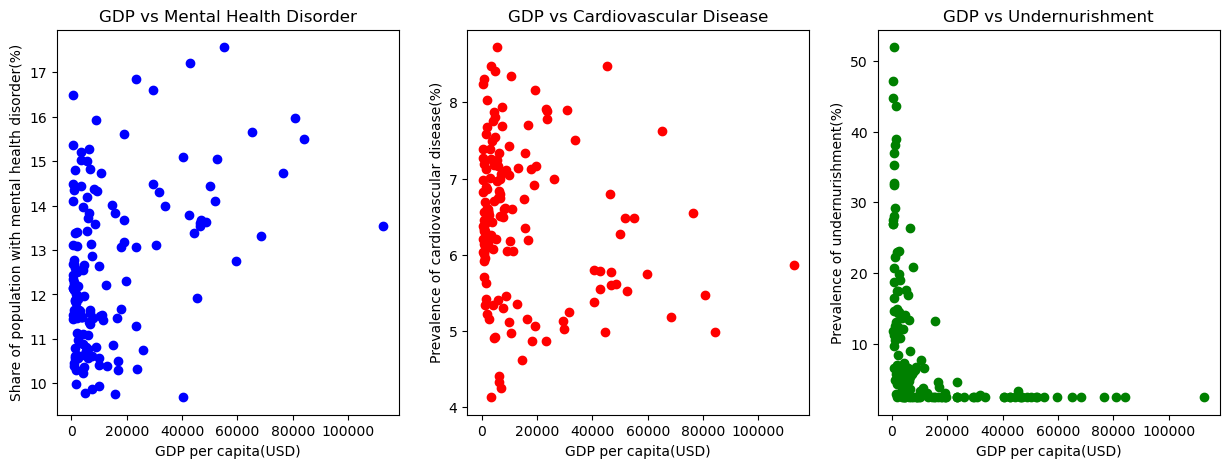

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

plt.subplot(1,3,1)
plt.plot('GDP', 'Mental Illness', 'bo', data = merged)
plt.xlabel('GDP per capita(USD)')
plt.ylabel('Share of population with mental health disorder(%)')
plt.title('GDP vs Mental Health Disorder')

plt.subplot(1,3,2)
plt.plot('GDP', 'Cardio Disease', 'ro', data = merged)
plt.xlabel('GDP per capita(USD)')
plt.ylabel('Prevalence of cardiovascular disease(%)')
plt.title('GDP vs Cardiovascular Disease')

plt.subplot(1,3,3)
plt.plot('GDP', 'Undernurished', 'go', data = merged)
plt.xlabel('GDP per capita(USD)')
plt.ylabel('Prevalence of undernurishment(%)')
plt.title('GDP vs Undernurishment')

### 상관 분석

산점도로 보아 GDP와 Mental Health Disorder의 확률은 약한 양적 상관관계를 보이고 있다. 하지만 나머지 변수들은 특정한 관계가 보이지 않는다. 

상관관계를 확인해보기 위해 상관 분석을 진행한다. 

#### GDP vs Mental health disorder

In [27]:
# 공분산
X = merged.GDP.values
Y = merged['Mental Illness'].values
print('covariance: ',np.cov([X, Y])[0][1])

# 상관 계수
print('correlation coefficient: ',np.corrcoef([X, Y])[0][1])

# 상관계수 검정
from scipy import stats
stats.pearsonr(X,Y)

covariance:  14563.963067063347
correlation coefficient:  0.4052962657485792


PearsonRResult(statistic=0.405296265748579, pvalue=3.5381855550794244e-07)

p-value가 0.5 이하인 3.54^(-7)이므로 어느 정도 뚜렸한 상관관계가 있다고 판단할 수 있다. 

#### GDP vs Cardiovascular Disease

In [28]:
# 공분산
X = merged.GDP.values
Y = merged['Cardio Disease'].values
print('covariance: ',np.cov([X, Y])[0][1])

# 상관 계수
print('correlation coefficient: ',np.corrcoef([X, Y])[0][1])

# 상관계수 검정
from scipy import stats
stats.pearsonr(X,Y)

covariance:  -3674.683278032922
correlation coefficient:  -0.18250088010859303


PearsonRResult(statistic=-0.18250088010859308, pvalue=0.02693689919346247)

p-value가 0.5 이하인 약 0.27이므로 GDP vs Mental health disorder보다는 약한 상관관계가 있다고 판단할 수 있다. 

#### GDP vs Undernurishment

In [29]:
# 공분산
X = merged.GDP.values
Y = merged.Undernurished.values
print('covariance: ',np.cov([X, Y])[0][1])

# 상관 계수
print('correlation coefficient: ',np.corrcoef([X, Y])[0][1])

# 상관계수 검정
from scipy import stats
stats.pearsonr(X,Y)

covariance:  -88774.91475581565
correlation coefficient:  -0.41003168065222484


PearsonRResult(statistic=-0.4100316806522249, pvalue=2.502046317764525e-07)

p-value가 0.5 이상인 2.5이므로 상관관계가 존재하지 않는다. 

따라서 그래프로 나타낸 값 중 통계적으로 중요한 상관 관계는 GDP와 정신질환, GDP와 심장병이 있다고 할 수 있다. 반면 영양 부족과는 특별한 관계를 보이지 않는다. 

### 회귀 분석

In [61]:
# GDP vs Mental Illness에 관한 단순 회귀 분석 진행
merged1 = merged
merged1.set_index('GDP', inplace=True)
display(merged1)
mental = merged1['Mental Illness']
display(mental)

,Country,Code,Year,Mental Illness,Cardio Disease,Undernurished
GDP,,,,,,
497.741429,Afghanistan,AFG,2019,16.496300,8.244712,26.9
2191.347764,Angola,AGO,2019,13.085214,6.569765,17.5
5396.214243,Albania,ALB,2019,10.820449,7.244842,4.1
45376.170838,United Arab Emirates,ARE,2019,11.919975,8.472263,3.4
9963.674162,Argentina,ARG,2019,12.648532,5.120149,3.4
...,...,...,...,...,...,...
3076.589886,Vanuatu,VUT,2019,11.628037,7.388266,10.8
4308.300729,Samoa,WSM,2019,11.110197,7.176123,7.4
6702.526617,South Africa,ZAF,2019,11.590322,6.740261,6.1


GDP
497.741429      16.496300
2191.347764     13.085214
5396.214243     10.820449
45376.170838    11.919975
9963.674162     12.648532
                  ...    
3076.589886     11.628037
4308.300729     11.110197
6702.526617     11.590322
1268.120941     11.881151
1421.868596     10.621419
Name: Mental Illness, Length: 147, dtype: float64

In [62]:
import numpy as np
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(mental.values.reshape(-1, 1), mental.index.to_numpy().reshape(-1, 1))

print(f"모델: y = {lr.intercept_} + {lr.coef_[0]}X + e")

모델: y = [-42965.82358223] + [4570.87761816]X + e


In [65]:
import statsmodels.api as sm

## 평가 / Evaluation

### 가설의 평가
분석 결과로 정신적 건강에 관한 가설은 어느 정도 맞았다고 볼 수 있다. 
하지만 신체적 건강의 지표와 GDP per capita의 관계는 분명하지 않았기 때문에 신체적 건강에 관한 가설은 정확하다고 판단하기 어렵다.

### 약점 및 개선할 점
해당 분석은 소득 수준과 여러 건강 요소의 관계를 알아보려는 목적에서 시작했다. 하지만 목적을 달성하기 위한 최적의 데이터를 설정하지 못한 것 같다. 현재의 방법으로는 각 국가 안의 빈부격차 수준, 시민들의 생활 방식, 이미 존재하는 건강 인프라 등 소득수준과 건강에 모두 영향을 줄 수 있는 외적 요소를 고려하지 못했다. 이러한 약점 때문에 GDP와 건강 지표 간 연관성이 매우 약하게 나타났던 것으로 예상할 수 있다. 

소득수준과 건강의 관련성을 확인하려면 국가 단위의 소득수준보다는 한 국가 안의 개인의 소득과 건강을 비교하는 방법이 더 적합했을 것이다. 이 방법으로는 국가 내 빈부격차의 정도나 사회계층의 비율 등이 일정하게 유지되기 때문에 더 유효한 결과를 기대할 수 있다. 

## 결론 / Conclusion

데이터 분석의 결과로 국가 단위에서 소득수준이 높을수록 정신 질환을 가질 확률이 늘어난다는 것을 알 수 있다. 고소득 국가에서 존재하는 빈부격차 등이 이러한 결과의 이유라는 추론이 존재하지만 고소득 국가에서 정신질환 검사를 더 쉽게 받을 수 있기 때문이라는 해석도 할 수 있다. 나머지 신체적 건강의 변수는 국가 소득수준과 약한 상관관계를 보였거나 관계를 보이지 않았다. 실제로 관계가 없다기 보다는 위에서 언급한 분석의 방법론 자체에서 문제가 있었기 때문에 관련 있는 결과를 보기 어려웠을 가능성이 크다.